In [167]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np 
#import openpyxl
import datetime

In [2]:
# To read the data from csv and load it into data frame
df = pd.read_csv ('C:\\Users\\shubh\\Desktop\\UCD\\Project\\Data Set\\bestsellers_with_categories_2022_03_27.csv')
print(df)
#df.head(5)

                                                  Name                 Author  \
0    Act Like a Lady, Think Like a Man: What Men Re...           Steve Harvey   
1    Arguing with Idiots: How to Stop Small Minds a...             Glenn Beck   
2            Breaking Dawn (The Twilight Saga, Book 4)        Stephenie Meyer   
3          Crazy Love: Overwhelmed by a Relentless God           Francis Chan   
4    Dead And Gone: A Sookie Stackhouse Novel (Sook...       Charlaine Harris   
..                                                 ...                    ...   
695                   The Wonderful Things You Will Be  Emily Winfield Martin   
696                                 Ugly Love: A Novel         Colleen Hoover   
697                                             Verity         Colleen Hoover   
698               What to Expect When You're Expecting          Heidi Murkoff   
699                            Where the Crawdads Sing            Delia Owens   

     User Rating  Reviews  

In [3]:
# Fill null values(NaN) with blank
df = df.fillna(0)
print(df)

                                                  Name                 Author  \
0    Act Like a Lady, Think Like a Man: What Men Re...           Steve Harvey   
1    Arguing with Idiots: How to Stop Small Minds a...             Glenn Beck   
2            Breaking Dawn (The Twilight Saga, Book 4)        Stephenie Meyer   
3          Crazy Love: Overwhelmed by a Relentless God           Francis Chan   
4    Dead And Gone: A Sookie Stackhouse Novel (Sook...       Charlaine Harris   
..                                                 ...                    ...   
695                   The Wonderful Things You Will Be  Emily Winfield Martin   
696                                 Ugly Love: A Novel         Colleen Hoover   
697                                             Verity         Colleen Hoover   
698               What to Expect When You're Expecting          Heidi Murkoff   
699                            Where the Crawdads Sing            Delia Owens   

     User Rating  Reviews  

In [13]:
# Counter for total count of Fictional and Non-Fictional records/books
counter_fict = 0
counter_nonfict = 0

for idx,row in df.iterrows():
    #print(row['Genre'])
    if row['Genre'] == 'Fiction':
        counter_fict = counter_fict + 1
    elif row['Genre'] == 'Non Fiction' :
        counter_nonfict = counter_nonfict + 1
    else:
        continue
print('Fiction :',counter_fict)
print('Non Fiction :',counter_nonfict)


Fiction : 312
Non Fiction : 388


In [14]:
#Converting the counters into a list to generate a graph
#Create Empty List
list_genre = []
#Append values to empty list
list_genre.append(counter_fict)
list_genre.append(counter_nonfict)
print('List Values : ',list_genre)

List Values :  [312, 388]


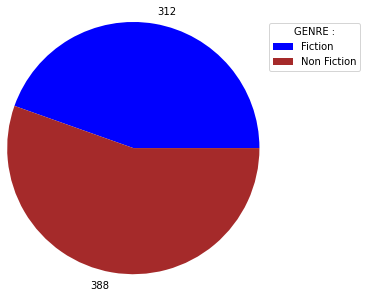

In [55]:
#Generate Pie chart
mylabels = ["Fiction", "Non Fiction"]
mycolors = ["blue", "brown"]

plt.pie(list_genre,labels = list_genre, colors = mycolors,  radius = 1.45)
plt.legend(title = "GENRE :", labels = mylabels, bbox_to_anchor=(1.1, 1.1))
plt.show()

In [117]:
#Generate multiple bar graph by preparing values yearwise
df_multiplebarchart = df.groupby(['Year','Genre']).sum()
#print(df_multiplebarchart)

#Unique List
Years = df['Year'].unique()

#Counters set to 0
fict_price = 0
non_fict_price = 0

#Empty list 
X_val = []
Fict_Price_val = []
Non_Fict_price_val = []

#Loop to sum price of Genres for a specific years from Unique Year List
for x in Years:
    fict_price = 0
    non_fict_price = 0
    #print('Year : ',x)
    for idx,row in df.iterrows():      
        if row['Genre'] == 'Fiction' and row['Year'] == x:
            fict_price = fict_price + row['Price']
        elif row['Genre'] == 'Non Fiction' and row['Year'] == x:
            non_fict_price = non_fict_price + row['Price']
        else:
            continue
    #print('Fiction Price :',fict_price)
    #print('Non Fiction Price :',non_fict_price)

    #Append the lists with sum of price
    X_val.append(x)
    Fict_Price_val.append(fict_price)
    Non_Fict_price_val.append(non_fict_price)

print(X_val)
print(Fict_Price_val)
print(Non_Fict_price_val)

[2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
[374, 194, 244, 258, 257, 295, 159, 240, 212, 184, 187, 190, 229, 304]
[396, 480, 511, 507, 473, 437, 362, 419, 357, 342, 317, 333, 310, 319]


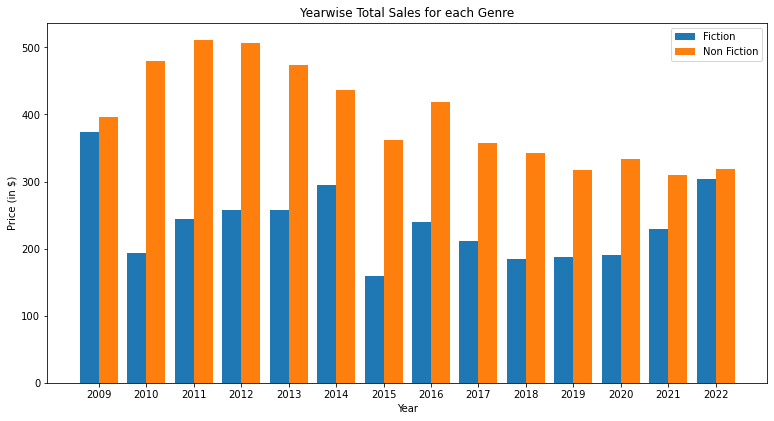

In [126]:
#Generate Multiple bar graph to represent Yearly Sales 
fig = plt.figure(figsize=(10, 5))
X_axis = np.arange(len(X_val))
ax = fig.add_axes([0,0,1,1])  
ax.bar(X_axis - 0.2, Fict_Price_val, 0.4, label = 'Fiction')
ax.bar(X_axis + 0.2, Non_Fict_price_val, 0.4, label = 'Non Fiction')
  
plt.xticks(X_axis, X_val)
plt.xlabel("Year")
plt.ylabel("Price (in $)")
plt.title("Yearwise Total Sales for each Genre")
plt.legend()
plt.show()

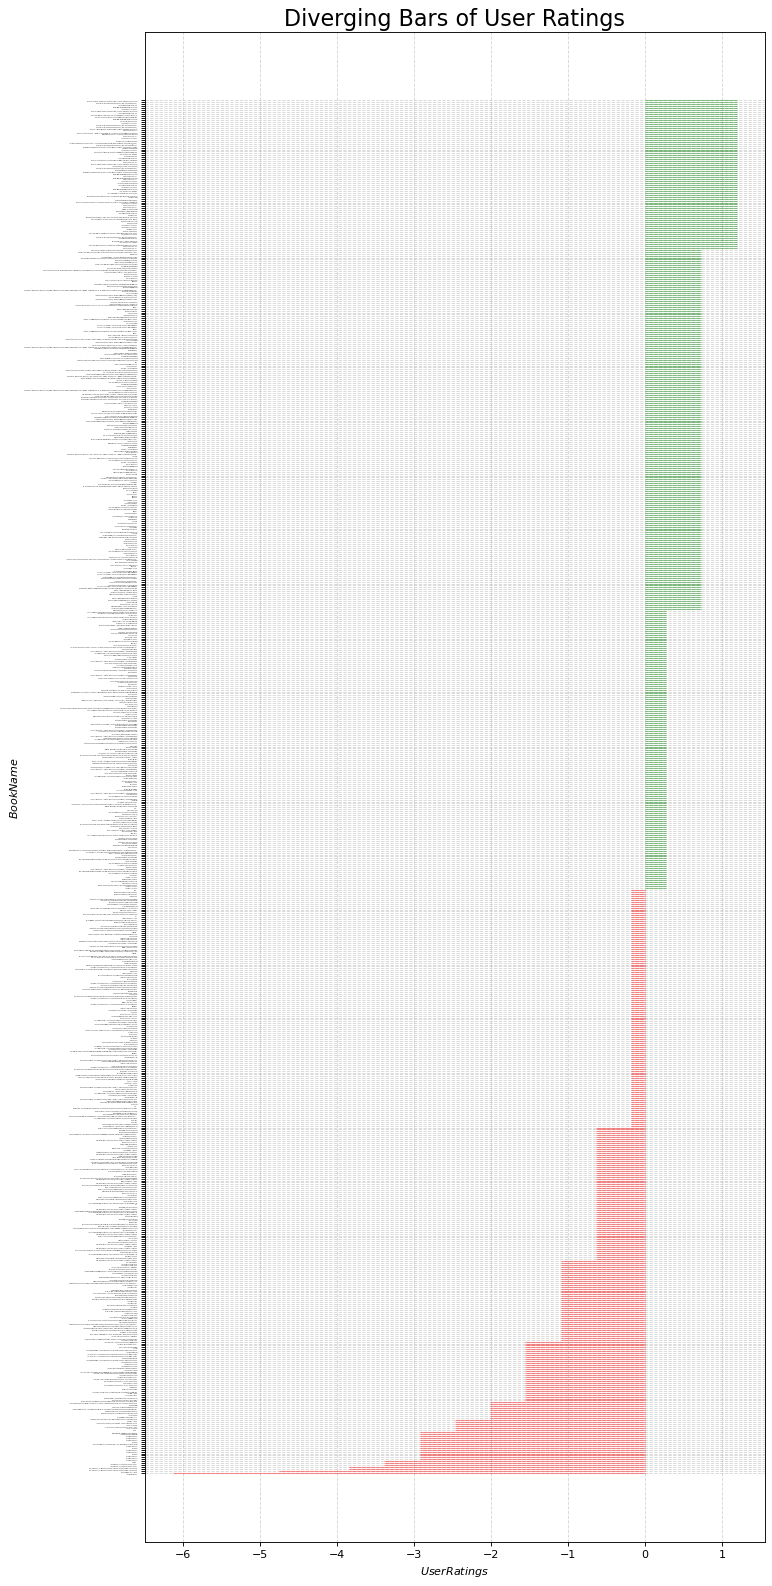

In [162]:
#Generating Diberging graph to get an idea how the ratings are for all books in the dataset
x = df.loc[:, ['User Rating']]
df['User Rating'] = (x - x.mean())/x.std()
df['colors'] = ['red' if x < 0 else 'green' for x in df['User Rating']]
df.sort_values('User Rating', inplace=True)

# Draw plot
plt.figure(figsize=(10,25), dpi= 80)
plt.hlines(y=df.index, xmin=0, xmax=df['User Rating'], color=df.colors, alpha=0.4, linewidth=1)

# Decorations
plt.gca().set(ylabel='$Book Name$', xlabel='$User Ratings$')
plt.yticks(df.index, df['Name'], fontsize=1)
plt.title('Diverging Bars of User Ratings', fontdict={'size':20})
plt.grid(linestyle='--', alpha=0.5)
plt.show()

In [210]:
#Calculating Positive and Negative Reviews which is not present in the dataset
pos_r = []
neg_r = []

cnt = 0

for idx,row in df.iterrows():
    pos_r1 = 0
    neg_r1 = 0
    pos_r1 = math.ceil((row['User Rating']/5) * row['Reviews'])
    neg_r1 = row['Reviews'] - pos_r1
    #Rounding up values to consider integers
    pos_r1 = math.ceil(pos_r1)
    neg_r1 = math.ceil(neg_r1)
    
    #Converting count of negative reviews into positive integers so as to use it in the graph
    if neg_r1 < 0 :
        neg_r1 = neg_r1 * (-1)
    pos_r.insert(cnt, pos_r1)
    neg_r.insert(cnt, neg_r1)
    cnt = cnt + 1

print(pos_r)
print(neg_r)

[7255, 15710, 58210, 58210, 44778, 44778, 8349, 7171, 7171, 7171, 7171, 7171, 7171, 81013, 7171, 33911, 81013, 7171, 2630, 50602, 7171, 81013, 3422, 44656, 119650, 3047, 2210, 119650, 13974, 2081, 3346, 2859, 21850, 2635, 785, 7220, 330, 8905, 30383, 1364, 82910, 10096, 1615, 243751, 131582, 17214, 22998, 11385, 22998, 5606, 24480, 5606, 10376, 5951, 6350, 7748, 22061, 20538, 12445, 243753, 3250, 131582, 12445, 49729, 22061, 12082, 3909, 31930, 2139, 45625, 2139, 20683, 148658, 13169, 18801, 8139, 1135, 2164, 68863, 6694, 2139, 6238, 27645, 5543, 52352, 2769, 18801, 20683, 13349, 13349, 22512, 5949, 11079, 13444, 1135, 13169, 7562, 784, 20683, 10759, 12568, 5255, 7562, 30348, 42076, 2139, 27645, 8266, 2139, 42385, 16063, 6472, 191966, 5399, 16063, 25477, 99898, 2964, 42385, 12504, 16063, 9039, 5643, 16063, 33106, 72632, 42385, 50061, 42385, 63869, 6472, 50061, 11880, 16063, 16063, 5152, 51549, 181232, 48123, 12504, 4331, 6742, 20144, 16063, 15896, 6876, 1348, 6876, 2271, 4727, 8889, 21

In [211]:
#Adding columns to and axisting dataframe
df['Positive_Reviews'] = pos_r
df['Negative_Reviews'] = neg_r

In [223]:
# Added 2 columns for Review (positive and Negative) at the end of the dataframe and displaying selected columns only
print(df[['Author', 'User Rating','Reviews','Positive_Reviews','Negative_Reviews']])

              Author  User Rating  Reviews  Positive_Reviews  Negative_Reviews
0       J.K. Rowling     3.870332     9372              7255              2117
1         Harper Lee     5.242792    14982             15710               728
2          E L James     6.157765    47265             58210             10945
3          E L James     6.157765    47265             58210             10945
4        Donna Tartt     6.615252    33844             44778             10934
..               ...          ...      ...               ...               ...
690  Bill Martin Jr.    11.190119    38969             87214             48245
691       Dav Pilkey    11.190119    12619             28242             15623
692    J. K. Rowling    11.190119     7758             17363              9605
698      Sarah Young    11.190119    19576             43812             24236
699       Dav Pilkey    11.190119     9089             20342             11253

[700 rows x 5 columns]


In [281]:
#Filtering df based on random Author names
df_1 = df[df['Author'] == 'E L James'] 
df_2 = df[df['Author'] == 'J.K. Rowling'] 
df_3 = df[df['Author'] == 'Jim Collins'] 
df_4 = df[df['Author'] == 'Stephenie Meyer'] 
df_5 = df[df['Author'] == 'George R.R. Martin'] 

#Merging above dataframes into one
frames = [df_1, df_2, df_3, df_4, df_5]
author_df = pd.concat(frames)
print(author_df)

     level_0  index                                               Name  \
2          2    155  Fifty Shades of Grey: Book One of the Fifty Sh...   
3          3    208  Fifty Shades of Grey: Book One of the Fifty Sh...   
90        88    317  Grey: Fifty Shades of Grey as Told by Christia...   
108       86    153                                Fifty Shades Darker   
159      124    156  Fifty Shades Trilogy (Fifty Shades of Grey / F...   
151      115    154  Fifty Shades Freed: Book Three of the Fifty Sh...   
0          0    178                                 The Casual Vacancy   
15        13    366  Harry Potter and the Cursed Child, Parts 1 & 2...   
362      417    361  Fantastic Beasts and Where to Find Them: The O...   
626      677    410  Harry Potter and the Prisoner of Azkaban: The ...   
632      670    365  Harry Potter and the Chamber of Secrets: The I...   
639      671    367  Harry Potter and the Sorcerer's Stone: The Ill...   
121      159     64  Good to Great: Wh

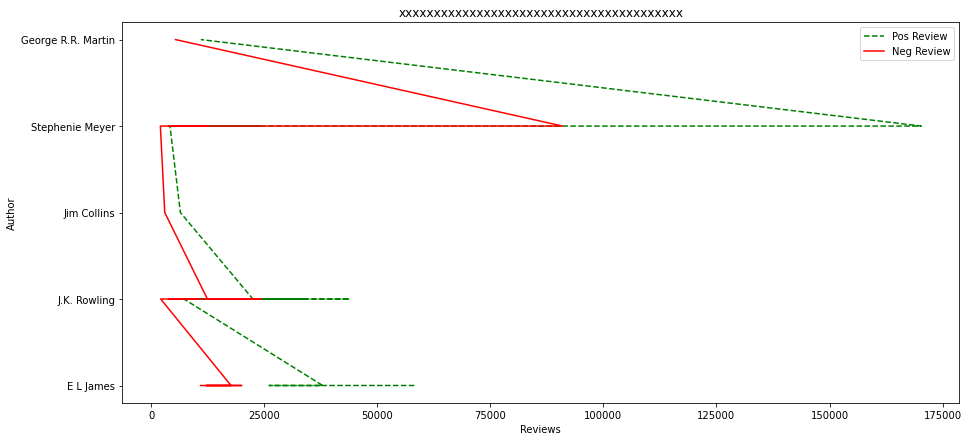

In [322]:
# create data
x = author_df['Positive_Reviews'].tolist()
y = author_df['Author'].tolist()
z = author_df['Negative_Reviews'].tolist()
fig = plt.figure(figsize=(15, 7))
# plot lines
plt.plot(x, y, label = "Pos Review", linestyle="--", color = "g")
plt.plot(z, y, label = "Neg Review", linestyle="-", color = "r")

plt.xlabel("Reviews")
plt.ylabel("Author")
plt.title("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")

plt.legend()
plt.show()

No handles with labels found to put in legend.


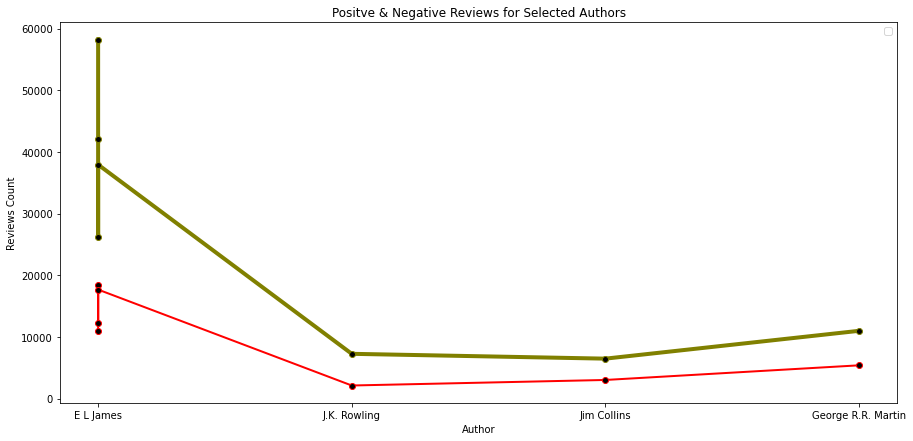

In [294]:
#Filtered to take 2012 records
author_df1 = author_df[author_df['Year'] == 2012]

# Generate multiple line plots
x = author_df1['Author'].tolist()
y = author_df1['Reviews'].tolist()
z = author_df1['Positive_Reviews'].tolist()
v = author_df1['Negative_Reviews'].tolist()

fig = plt.figure(figsize=(15, 7))
plt.plot( x, z, color='olive', marker='.', markerfacecolor='black', markersize=12, linewidth=4)
plt.plot( x, v, color='red', marker='.', markerfacecolor='black', markersize=12, linewidth=2)

#plt.plot( author_df['Author'], author_df['Negative_Reviews'], data=author_df, marker='', color='pink', linewidth=2, linestyle='dashed', label="toto")
plt.xlabel("Author")
plt.ylabel("Reviews Count")
plt.title("Positve & Negative Reviews for Selected Authors")

# show legend
plt.legend()

# show graph
plt.show()

#print(author_df1)

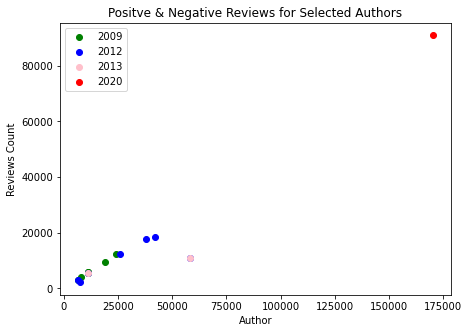

In [321]:
#Generate scatter plot yearwise for Reviews
#2009
author_df1 = author_df[author_df['Year'] == 2009]
x = author_df1['Positive_Reviews'].tolist()
y = author_df1['Negative_Reviews'].tolist()
fig = plt.figure(figsize=(7, 5))
plt.scatter(x, y, color = 'green')

#2012
author_df1 = author_df[author_df['Year'] == 2012]
x = author_df1['Positive_Reviews'].tolist()
y = author_df1['Negative_Reviews'].tolist()
plt.scatter(x, y, color = 'blue')

#2013
author_df1 = author_df[author_df['Year'] == 2013]
x = author_df1['Positive_Reviews'].tolist()
y = author_df1['Negative_Reviews'].tolist()
plt.scatter(x, y, color = 'pink')

#2020
author_df1 = author_df[author_df['Year'] == 2020]
x = author_df1['Positive_Reviews'].tolist()
y = author_df1['Negative_Reviews'].tolist()
plt.scatter(x, y, color = 'red')

plt.xlabel("Author")
plt.ylabel("Reviews Count")
plt.title("Positve & Negative Reviews for Selected Authors")

# produce a legend with the unique colors from the scatter
plt.legend(["2009","2012","2013","2020"])

